In [35]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

current_dir = os.getcwd()
data_fldr = os.path.join(current_dir, "data")
out_dir = os.path.join(current_dir, "data", "output")

# Dataset

https://www.lta.gov.sg/content/ltagov/en/who_we_are/statistics_and_publications/statistics.html <br>

https://docs.google.com/spreadsheets/d/1Ma8dm_rdtdfNp8ONUG5ykFHwrEg1GFC3ObOMualMVBM/edit#gid=0

## Understanding the dataset

In [36]:
coe_df = pd.read_excel(os.path.join(data_fldr, "COE_Result.xlsx"))
coe_df

,Month of Bidding Exercise,Bidding,Category,Statistic,Value
0,2024-05-01,1,A,Quota,968
1,2024-05-01,1,A,Successful bids,968
2,2024-05-01,1,A,Bids received,1632
3,2024-05-01,1,A,Quota Premium,93604
4,2024-05-01,1,B,Quota,666
...,...,...,...,...,...
11755,2024-06-01,1,D,Quota Premium,8989
11756,2024-06-01,1,E,Quota,183
11757,2024-06-01,1,E,Successful bids,NaN
11758,2024-06-01,1,E,Bids received,319


## Transformations

Adding of `Year` column

In [37]:
coe_df['Year'] = coe_df['Month of Bidding Exercise'].dt.year
coe_df

,Month of Bidding Exercise,Bidding,Category,Statistic,Value,Year
0,2024-05-01,1,A,Quota,968,2024
1,2024-05-01,1,A,Successful bids,968,2024
2,2024-05-01,1,A,Bids received,1632,2024
3,2024-05-01,1,A,Quota Premium,93604,2024
4,2024-05-01,1,B,Quota,666,2024
...,...,...,...,...,...,...
11755,2024-06-01,1,D,Quota Premium,8989,2024
11756,2024-06-01,1,E,Quota,183,2024
11757,2024-06-01,1,E,Successful bids,NaN,2024
11758,2024-06-01,1,E,Bids received,319,2024


To convert all the `Bidding` = 2 to be in the middle of `Month of Bidding Exercise` month


In [38]:
bidding_2_indices = coe_df.loc[coe_df['Bidding'] == 2, :].index
coe_df.loc[bidding_2_indices, 'Month of Bidding Exercise'] = coe_df.loc[bidding_2_indices, 'Month of Bidding Exercise'] +  pd.DateOffset(days=14)
coe_df

,Month of Bidding Exercise,Bidding,Category,Statistic,Value,Year
0,2024-05-01,1,A,Quota,968,2024
1,2024-05-01,1,A,Successful bids,968,2024
2,2024-05-01,1,A,Bids received,1632,2024
3,2024-05-01,1,A,Quota Premium,93604,2024
4,2024-05-01,1,B,Quota,666,2024
...,...,...,...,...,...,...
11755,2024-06-01,1,D,Quota Premium,8989,2024
11756,2024-06-01,1,E,Quota,183,2024
11757,2024-06-01,1,E,Successful bids,NaN,2024
11758,2024-06-01,1,E,Bids received,319,2024


Removal of all the NULL values in COE Premium prices due to COVID <br>
Better to exclude than to use mean

In [39]:
coe_df_notNULL = coe_df.loc[~(coe_df['Value'] == "-"), :]

To only look at the Quota Premium <br>
<br>
Having a copy to `coe_plot` in the end for easy adjustments

In [40]:
coe_df_premium = coe_df_notNULL.loc[coe_df_notNULL['Statistic'] == "Quota Premium", :]

Adding groupby to view the data via the Year(s)

In [41]:
coe_df_premium_groupby = coe_df_premium.groupby(['Year', 'Category'])['Value'].mean().reset_index()
coe_df_premium_groupby

,Year,Category,Value
0,2000,A,38981.083333
1,2000,B,38755.833333
2,2000,C,21750.416667
3,2000,D,1351.500000
4,2000,E,40179.333333
...,...,...,...
120,2024,A,85091.916667
121,2024,B,100724.250000
122,2024,C,70575.666667
123,2024,D,9401.416667


In [42]:
export_df = 0
# Assuming df1 and df2 are two DataFrames you want to export
if export_df:
    with pd.ExcelWriter(os.path.join(out_dir,'COE_Export.xlsx')) as writer:
        coe_df_premium_groupby.to_excel(writer, sheet_name='Yearly', index=False)
        coe_df_premium.to_excel(writer, sheet_name='Quarterly', index=False)


In [43]:
coe_plot_bid = coe_df_premium.copy()
coe_plot_year = coe_df_premium_groupby.copy()

# Computations

## Moving Averages

In [44]:
coe_cat = "A"
coe_df_premium_x = coe_df_premium.loc[coe_df_premium['Category'] == coe_cat, :].sort_values(by=['Month of Bidding Exercise'])
coe_df_premium_x['MovingAverage5'] = coe_df_premium_x.loc[:, ['Value']].rolling(5).mean()
coe_df_premium_x['MovingAverage13'] = coe_df_premium_x.loc[:, ['Value']].rolling(13).mean()
coe_df_premium_x['MovingAverage48'] = coe_df_premium_x.loc[:, ['Value']].rolling(48).mean()
coe_df_premium_x['MovingAverage120'] = coe_df_premium_x.loc[:, ['Value']].rolling(120).mean()
coe_df_premium_x

,Month of Bidding Exercise,Bidding,Category,Statistic,Value,Year,MovingAverage5,MovingAverage13,MovingAverage48,MovingAverage120
7115,2000-01-01,1,A,Quota Premium,43802,2000,NaN,NaN,NaN,NaN
7355,2000-01-15,2,A,Quota Premium,43802,2000,NaN,NaN,NaN,NaN
7119,2000-02-01,1,A,Quota Premium,43998,2000,NaN,NaN,NaN,NaN
7359,2000-02-15,2,A,Quota Premium,43998,2000,NaN,NaN,NaN,NaN
7123,2000-03-01,1,A,Quota Premium,39300,2000,42980.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3483,2024-04-15,2,A,Quota Premium,94010,2024,85660.0,85662.230769,87941.750000,59861.208333
3,2024-05-01,1,A,Quota Premium,93604,2024,89020.6,84708.692308,88414.729167,60427.166667
3463,2024-05-15,2,A,Quota Premium,92700,2024,90960.6,84478.769231,88929.291667,60980.491667
11723,2024-05-15,2,A,Quota Premium,92700,2024,92402.8,85071.000000,89323.020833,61533.750000


## Relative Strength Index

In [45]:
# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI from the 'Value' column
coe_df_premium_x['RSI'] = calculate_rsi(coe_df_premium_x['Value'])

In [46]:
coe_df_premium_x

,Month of Bidding Exercise,Bidding,Category,Statistic,Value,Year,MovingAverage5,MovingAverage13,MovingAverage48,MovingAverage120,RSI
7115,2000-01-01,1,A,Quota Premium,43802,2000,NaN,NaN,NaN,NaN,NaN
7355,2000-01-15,2,A,Quota Premium,43802,2000,NaN,NaN,NaN,NaN,NaN
7119,2000-02-01,1,A,Quota Premium,43998,2000,NaN,NaN,NaN,NaN,NaN
7359,2000-02-15,2,A,Quota Premium,43998,2000,NaN,NaN,NaN,NaN,NaN
7123,2000-03-01,1,A,Quota Premium,39300,2000,42980.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3483,2024-04-15,2,A,Quota Premium,94010,2024,85660.0,85662.230769,87941.750000,59861.208333,43.798248
3,2024-05-01,1,A,Quota Premium,93604,2024,89020.6,84708.692308,88414.729167,60427.166667,44.093853
3463,2024-05-15,2,A,Quota Premium,92700,2024,90960.6,84478.769231,88929.291667,60980.491667,42.348759
11723,2024-05-15,2,A,Quota Premium,92700,2024,92402.8,85071.000000,89323.020833,61533.750000,48.049032


# Plotting

Raw Quota Premium Data

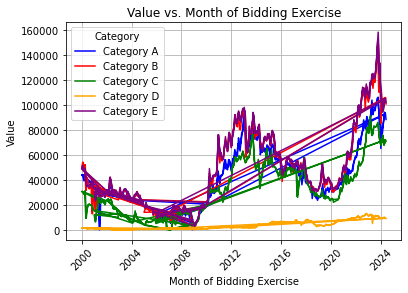

In [47]:
category_colors = {
    'A': 'blue',
    'B': 'red',
    'C': 'green',
    'D': 'orange',
    'E': 'purple'
}

# Plot each category separately
for category, color in category_colors.items():
    category_df = coe_plot_bid[coe_plot_bid['Category'] == category]
    plt.plot(pd.to_datetime(category_df['Month of Bidding Exercise']), category_df['Value'].astype(float), label=f'Category {category}', color=color)

# Customize the plot
plt.title('Value vs. Month of Bidding Exercise')
plt.xlabel('Month of Bidding Exercise')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)



# Show the plot
plt.show()


Yearly Mean Quota Premium

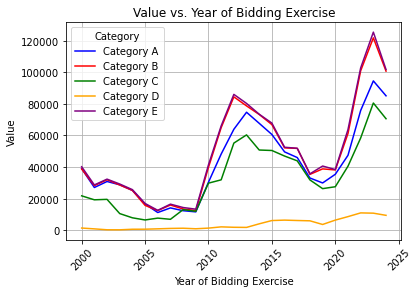

In [48]:
category_colors = {
    'A': 'blue',
    'B': 'red',
    'C': 'green',
    'D': 'orange',
    'E': 'purple'
}

# Plot each category separately
for category, color in category_colors.items():
    category_df = coe_plot_year[coe_plot_year['Category'] == category]
    plt.plot(category_df['Year'], category_df['Value'].astype(float), label=f'Category {category}', color=color)

# Customize the plot
plt.title('Value vs. Year of Bidding Exercise')
plt.xlabel('Year of Bidding Exercise')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)



# Show the plot
plt.show()


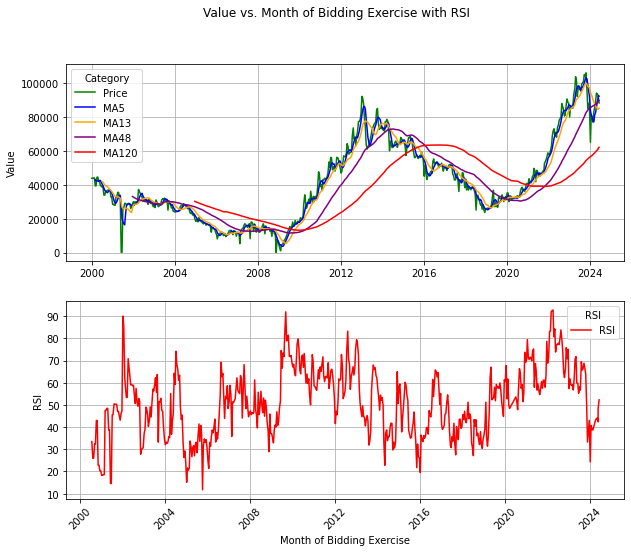

In [49]:

# Set the figure size
plt.figure(figsize=(10, 8), facecolor="white")  # Adjust the figure size as needed

# Create subplots
plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
plt.plot(pd.to_datetime(coe_df_premium_x['Month of Bidding Exercise']), coe_df_premium_x['Value'].astype(float), label='Price', color="green")
plt.plot(pd.to_datetime(coe_df_premium_x['Month of Bidding Exercise']), coe_df_premium_x['MovingAverage5'].astype(float), label='MA5', color="blue")
plt.plot(pd.to_datetime(coe_df_premium_x['Month of Bidding Exercise']), coe_df_premium_x['MovingAverage13'].astype(float), label='MA13', color="orange")
plt.plot(pd.to_datetime(coe_df_premium_x['Month of Bidding Exercise']), coe_df_premium_x['MovingAverage48'].astype(float), label='MA48', color="purple")
plt.plot(pd.to_datetime(coe_df_premium_x['Month of Bidding Exercise']), coe_df_premium_x['MovingAverage120'].astype(float), label='MA120', color="red")
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Category')

plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
plt.plot(pd.to_datetime(coe_df_premium_x['Month of Bidding Exercise']), coe_df_premium_x['RSI'], label='RSI', color="red")
plt.ylabel('RSI')
plt.grid(True)
plt.legend(title='RSI')

# Common X-axis label
plt.xlabel('Month of Bidding Exercise')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Title for the entire plot
plt.suptitle('Value vs. Month of Bidding Exercise with RSI')

plt.savefig(os.path.join(out_dir, 'value_vs_month_with_rsi_plot.png'), bbox_inches='tight')  # 'bbox_inches' helps to prevent cropping of labels

# Show the plot
plt.show()